# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [75]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [76]:
# Set the API base URL
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"
geo_url = f"http://api.openweathermap.org/geo/1.0/direct?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Create endpoint URL with each city
        geo_url_query = geo_url + f"&q={city}"
        geo_data = requests.get(geo_url_query).json()
        lattitude = geo_data[0]['lat']
        longitude = geo_data[0]['lon']

        # Parse the JSON and retrieve data
        city_url = weather_url + f"&lat={lattitude}&lon={longitude}"

        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['clouds']['all']
        city_country = city_weather['sys']['country']
        city_date = datetime.datetime.fromtimestamp(int(city_weather['dt'])).date()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | lappeenranta
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | ocean city
Processing Record 7 of Set 1 | marathon
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | tual
Processing Record 12 of Set 1 | jabor
Processing Record 13 of Set 1 | candolim
Processing Record 14 of Set 1 | pundong
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | villa union
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | ke-macina
Processing Record 20 of Set 1 | revda
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | port elizabeth
Processing

In [77]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [78]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-35.2705,174.0805,283.64,90,54,54,NZ,2023-07-23
1,petropavlovsk-kamchatsky,53.0200,158.6471,289.21,91,44,44,RU,2023-07-23
2,lappeenranta,61.0584,28.1863,290.81,72,0,0,FI,2023-07-23
3,talnakh,69.4940,88.3908,284.03,86,41,41,RU,2023-07-23
4,port-aux-francais,-49.3498,70.2200,279.44,82,81,81,TF,2023-07-23


In [80]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [81]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-35.2705,174.0805,283.64,90,54,54,NZ,2023-07-23
1,petropavlovsk-kamchatsky,53.0200,158.6471,289.21,91,44,44,RU,2023-07-23
2,lappeenranta,61.0584,28.1863,290.81,72,0,0,FI,2023-07-23
3,talnakh,69.4940,88.3908,284.03,86,41,41,RU,2023-07-23
4,port-aux-francais,-49.3498,70.2200,279.44,82,81,81,TF,2023-07-23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

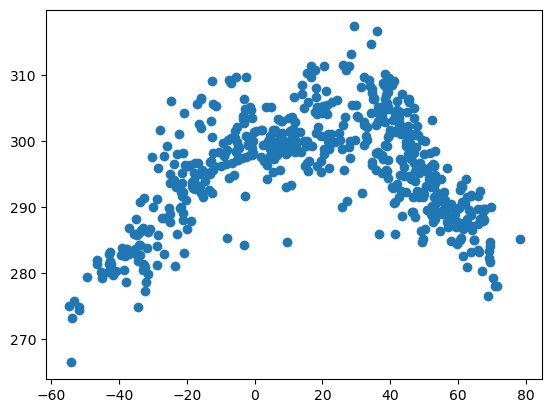

In [87]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

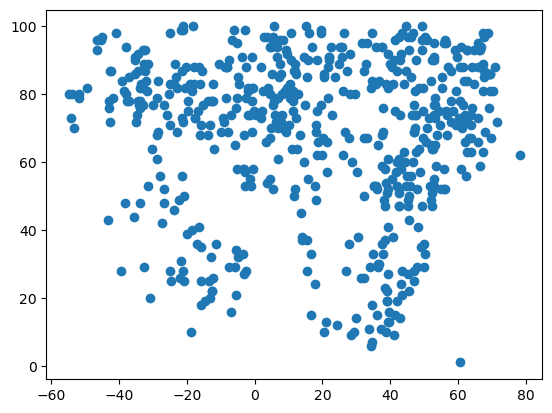

In [88]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

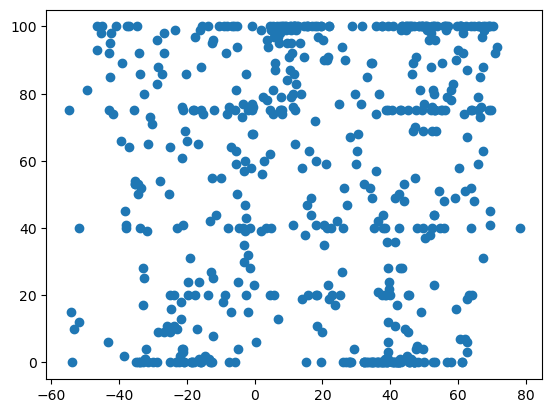

In [89]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

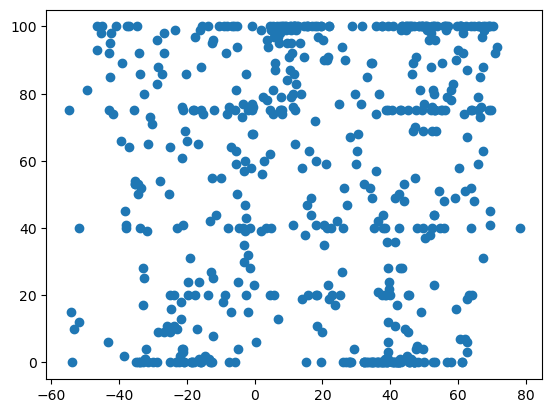

In [90]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0200,158.6471,289.21,91,44,44,RU,2023-07-23
2,lappeenranta,61.0584,28.1863,290.81,72,0,0,FI,2023-07-23
3,talnakh,69.4940,88.3908,284.03,86,41,41,RU,2023-07-23
5,ocean city,39.2776,-74.5746,304.92,52,3,3,US,2023-07-23
6,marathon,38.1533,23.9621,308.44,49,0,0,GR,2023-07-23


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-35.2705,174.0805,283.64,90,54,54,NZ,2023-07-23
4,port-aux-francais,-49.3498,70.2200,279.44,82,81,81,TF,2023-07-23
8,adamstown,-25.0667,-130.1002,293.65,71,9,9,PN,2023-07-23
9,grytviken,-54.2806,-36.5098,266.45,73,15,15,GS,2023-07-23
10,tual,-5.6390,132.7429,298.53,76,63,63,ID,2023-07-23


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


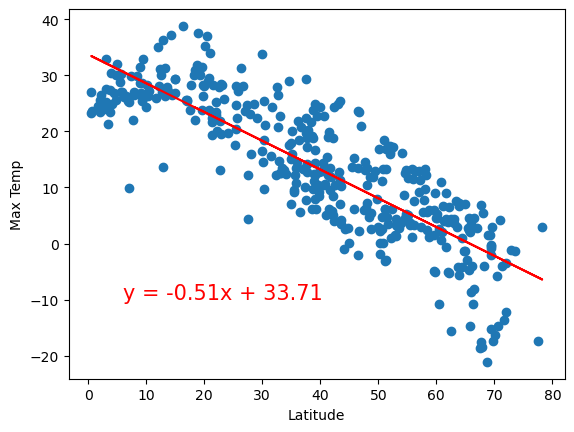

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


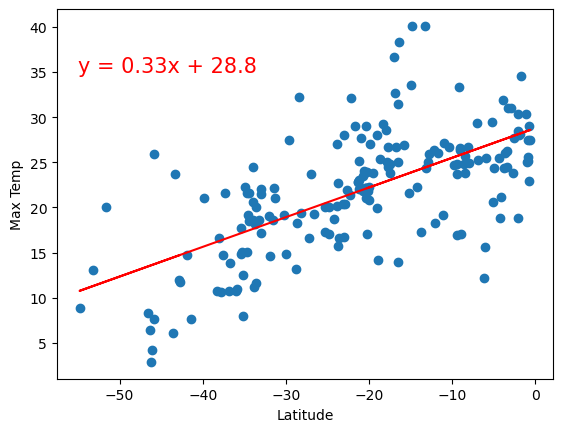

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


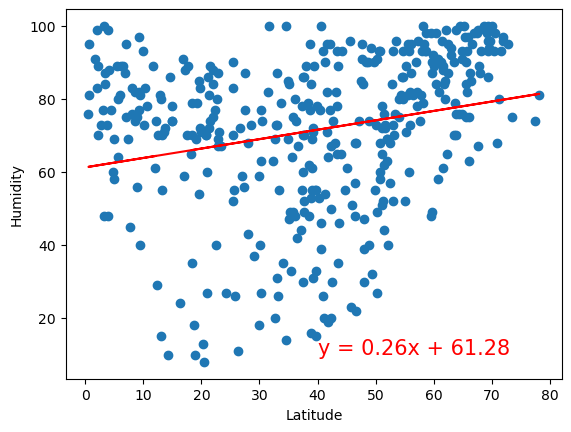

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


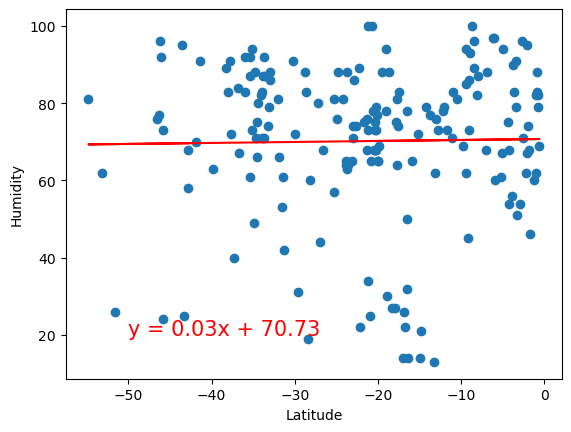

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


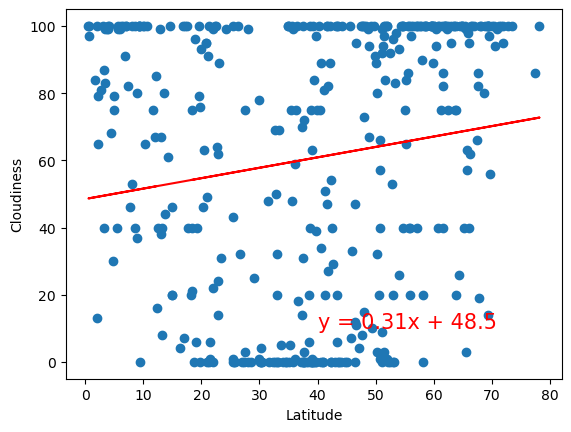

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


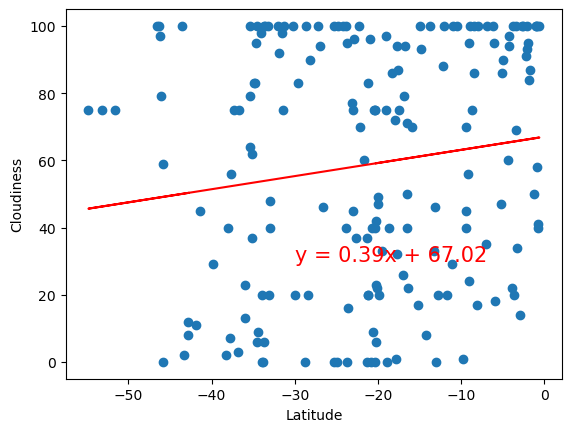

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


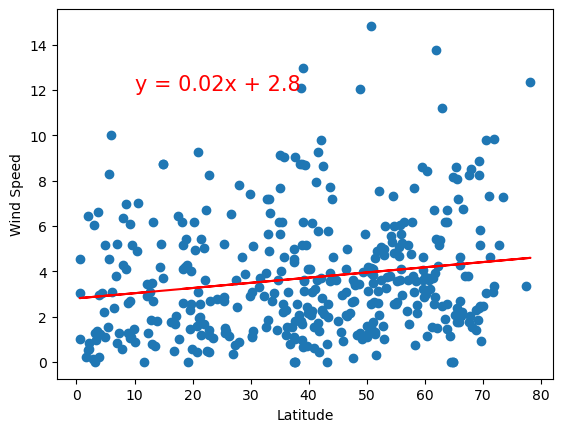

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


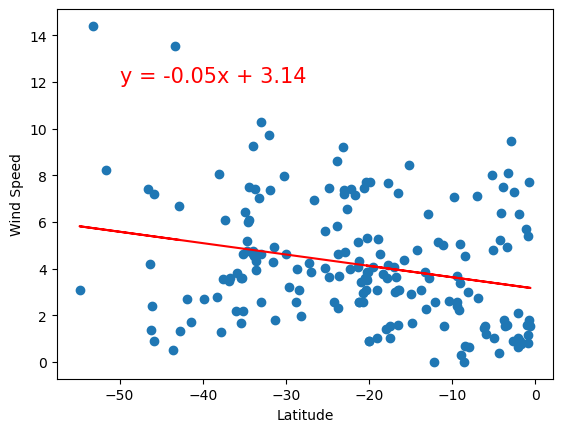

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE